In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.preprocessing import StandardScaler
#from google.colab import drive


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Data Preprocessing

In [78]:
#drive.mount('/content/gdrive', force_remount=True)
data = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
testId = test["PassengerId"]
print(data.shape)
print(test.shape)

(891, 12)
(418, 11)


In [79]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


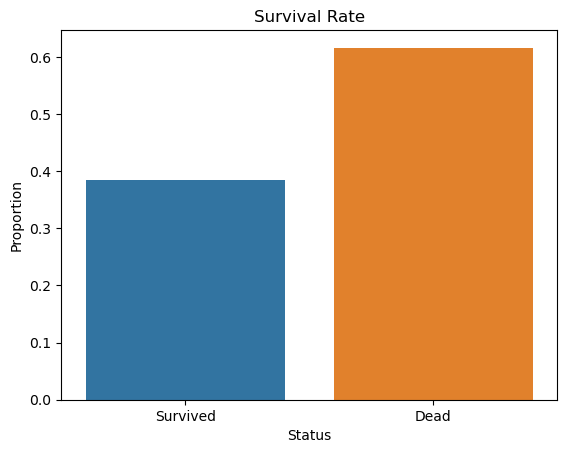

In [80]:
# Check the proportion of Dead and Survived
from matplotlib import pyplot as plt
import seaborn as sns

_ = data["Survived"].value_counts()
dead = _[0]
alive = _[1]

Survived = alive/(dead + alive)
Dead = dead/(dead + alive)

# Create a bar plot with Seaborn
sns.barplot(x=["Survived", "Dead"], y=[Survived, Dead])

# Set the plot title and axes labels
plt.title("Survival Rate")
plt.xlabel("Status")
plt.ylabel("Proportion")

# Show the plot
plt.show()

In [81]:
# Dropping irrelevant columns, fill null values with median(numerical vars) & mode(categorical var)

def data_cleaning(data):
    data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
    
    cols = ["Age", "SibSp", "Parch", "Fare"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace = True)
        
    data.Embarked.fillna(data["Embarked"].mode()[0], inplace = True)
    return data

In [82]:
data = data_cleaning(data)
test = data_cleaning(test)
print(data.shape)
print(test.shape)

(891, 8)
(418, 7)


In [83]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [84]:
# Transform categorical variables into numerical variables & standardise numerical variables
def transform(data):
    
    # One-hot encoding & standardisation
    data = pd.get_dummies(data, columns = ["Sex", "Embarked"])

    # Select columns to standardize by name
    cols_to_standardize = ['Age', 'Fare']

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Standardize the selected columns
    data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])
    
    return data
    

In [85]:
data = transform(data)
test = transform(test)

print(data.shape)
data.head()

(891, 11)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.565736,1,0,-0.502445,0,1,0,0,1
1,1,1,0.663861,1,0,0.786845,1,0,1,0,0
2,1,3,-0.258337,0,0,-0.488854,1,0,0,0,1
3,1,1,0.433312,1,0,0.420730,1,0,0,0,1
4,0,3,0.433312,0,0,-0.486337,0,1,0,0,1


In [86]:
print(test.shape)
test.head()

(418, 10)


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.386231,0,0,-0.497413,0,1,0,1,0
1,3,1.371370,1,0,-0.512278,1,0,0,0,1
2,2,2.553537,0,0,-0.464100,0,1,0,1,0
3,3,-0.204852,0,0,-0.482475,0,1,0,0,1
4,3,-0.598908,1,1,-0.417492,1,0,0,0,1


# Treating Imbalanced Dataset with SMOTE + Train Test Split

In [87]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# perform SMOTE to balance the target variable
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# check the new class distribution
print(y_res.value_counts())


# Perform a stratified train-test-validation split with 60% train, 20% validation, and 20% test data
X_train_val, X_test, y_train_val, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Verify the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

0    549
1    549
Name: Survived, dtype: int64
X_train shape: (658, 10)
y_train shape: (658,)
X_val shape: (220, 10)
y_val shape: (220,)
X_test shape: (220, 10)
y_test shape: (220,)


# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Use the trained model to make probability predictions on the test set
y_pred_proba = rf_clf.predict_proba(X_test)[:,1]

# Print the scores on training and test set
print('Training set score: {:.4f}'.format(rf_clf.score(X_train,y_train)))
print('Test set score: {:.4f}'.format(rf_clf.score(X_test, y_test)))

Training set score: 0.9878
Test set score: 0.8136


# Light GBM

In [89]:
import lightgbm as lgb

# Train a LightGBM classifier
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train, y_train)

# Use the trained model to make probability predictions on the test set
y_pred_proba = lgb_clf.predict_proba(X_test)[:,1]

# Print the scores on training and test set
print('Training set score: {:.4f}'.format(lgb_clf.score(X_train,y_train)))
print('Test set score: {:.4f}'.format(lgb_clf.score(X_test, y_test)))

Training set score: 0.9711
Test set score: 0.7864


# XG Boost

In [90]:
import xgboost as xgb

# Initialize an XGBoost classification model
xg_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Train the model on the training set
xg_clf.fit(X_train, y_train)

# Use the trained model to make probability predictions on the test set
y_pred_proba = xg_clf.predict_proba(X_test)[:,1]

# print the scores on training and test set

print('Training set score: {:.4f}'.format(xg_clf.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(xg_clf.score(X_test, y_test)))

Training set score: 0.8951
Test set score: 0.8182


In [91]:
y_test_pred = xg_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[93 17]
 [23 87]]

True Positives(TP) =  93

True Negatives(TN) =  87

False Positives(FP) =  17

False Negatives(FN) =  23


<AxesSubplot:>

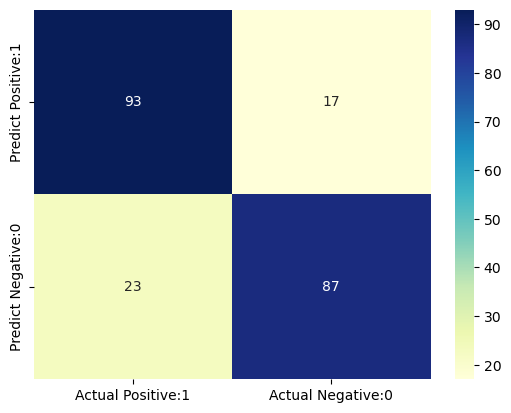

In [92]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.84      0.79      0.81       110

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220



# Ensemble Models of Random Forest, Light GBM and XG Boost

In [94]:
from sklearn.metrics import accuracy_score

# Initialize the individual models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
lgb_clf = lgb.LGBMClassifier(random_state=42)
xg_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

rf_clf.fit(X_train, y_train)
lgb_clf.fit(X_train, y_train)
xg_clf.fit(X_train, y_train)

# Make predictions using each individual classifier
rf_preds = rf_clf.predict(X_test)
lgb_preds = lgb_clf.predict(X_test)
xg_preds = xg_clf.predict(X_test)

# Combine the predictions using a majority vote
ensemble_preds = (rf_preds + lgb_preds + xg_preds) >= 2

# Calculate the accuracy of the ensemble predictions
ensemble_score = accuracy_score(y_test, ensemble_preds)

print("Ensemble training score: {:.4f}".format(accuracy_score(y_train, (rf_clf.predict(X_train) + lgb_clf.predict(X_train) + xg_clf.predict(X_train)) >= 2)))
print("Ensemble test score: {:.4f}".format(ensemble_score))

Ensemble training score: 0.9726
Ensemble test score: 0.8045


In [95]:
cm = confusion_matrix(y_test, ensemble_preds)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[89 21]
 [22 88]]

True Positives(TP) =  89

True Negatives(TN) =  88

False Positives(FP) =  21

False Negatives(FN) =  22


              precision    recall  f1-score   support

           0       0.80      0.81      0.81       110
           1       0.81      0.80      0.80       110

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220



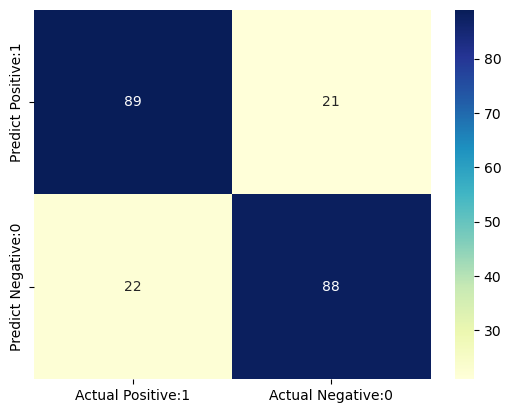

In [96]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test, ensemble_preds)) 

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distributions for random search
rf_param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None] + list(range(5, 20)),
    'max_features': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

xg_param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': list(range(5, 20)),
    'learning_rate': uniform(0.001, 0.1),
    'gamma': uniform(0, 1),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
}

lgb_param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': list(range(5, 20)),
    'learning_rate': uniform(0.001, 0.1),
    'num_leaves': randint(2, 40),
    'feature_fraction': uniform(0.5, 0.5),
    'bagging_fraction': uniform(0.5, 0.5),
    'bagging_freq': randint(1, 10),
    'min_child_samples': randint(1, 20)
}

# Initialize the individual models
tuned_rf_clf = RandomForestClassifier(random_state=42)
tuned_lgb_clf = lgb.LGBMClassifier(random_state=42)
tuned_xg_clf = xgb.XGBClassifier(objective='binary:logistic', seed=123)

# Perform random search tuning for the random forest classifier
rf_search = RandomizedSearchCV(tuned_rf_clf, param_distributions=rf_param_dist, cv=5, n_iter=40, random_state=42)
rf_search.fit(X_train, y_train)
tuned_rf_clf = rf_search.best_estimator_

# Perform random search tuning for the XGBoost classifier
xg_search = RandomizedSearchCV(tuned_xg_clf, param_distributions=xg_param_dist, cv=5, n_iter=40, random_state=42)
xg_search.fit(X_train, y_train)
tuned_xg_clf = xg_search.best_estimator_

# Perform random search tuning for the LightGBM classifier
lgb_search = RandomizedSearchCV(tuned_lgb_clf, param_distributions=lgb_param_dist, cv=5, n_iter=40, random_state=42)
lgb_search.fit(X_train, y_train)
tuned_lgb_clf = lgb_search.best_estimator_

# Fit the individual models on the training data
tuned_rf_clf.fit(X_train, y_train)
tuned_lgb_clf.fit(X_train, y_train)
tuned_xg_clf.fit(X_train, y_train)

# Make predictions using each individual classifier
rf_preds = tuned_rf_clf.predict(X_val)
lgb_preds = tuned_lgb_clf.predict(X_val)
xg_preds = tuned_xg_clf.predict(X_val)

# Combine the predictions using a majority vote
ensemble_preds = (rf_preds + lgb_preds + xg_preds) >= 2

# Calculate the accuracy of the ensemble predictions
ensemble_score = accuracy_score(y_val, ensemble_preds)

print("Ensemble training score: {:.4f}".format(accuracy_score(y_train, (tuned_rf_clf.predict(X_train) + tuned_lgb_clf.predict(X_train) + tuned_xg_clf.predict(X_train)) >= 2)))
print("Ensemble validation score: {:.4f}".format(ensemble_score))


[LightGBM] [Warning] bagging_fraction is set=0.6872700594236812, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6872700594236812
[LightGBM] [Warning] feature_fraction is set=0.7993292420985183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7993292420985183
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] bagging_fraction is set=0.6872700594236812, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6872700594236812
[LightGBM] [Warning] feature_fraction is set=0.7993292420985183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7993292420985183
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] bagging_fraction is set=0.6872700594236812, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6872700594236812
[LightGBM] [Warning] feature_fracti

In [98]:
cm = confusion_matrix(y_test, ensemble_preds)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[62 48]
 [65 45]]

True Positives(TP) =  62

True Negatives(TN) =  45

False Positives(FP) =  48

False Negatives(FN) =  65


<AxesSubplot:>

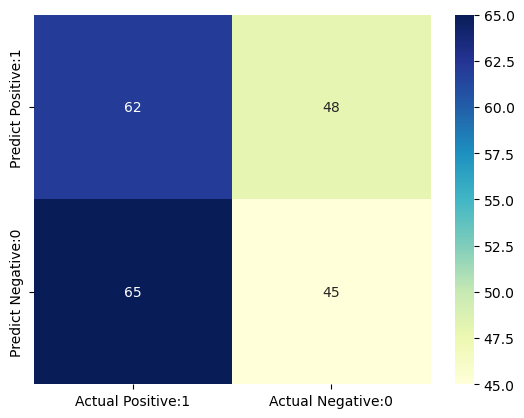

In [99]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [100]:
# Make predictions using each individual classifier
rf_preds = tuned_rf_clf.predict(test)
lgb_preds = tuned_lgb_clf.predict(test)
xg_preds = tuned_xg_clf.predict(test)

# Combine the predictions using a majority vote
ensemble_preds = (rf_preds + lgb_preds + xg_preds) >= 2

submission_preds = ensemble_preds.astype(int)

In [101]:
submission_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [102]:
df = pd.DataFrame({"PassengerId": testId.values,
                   "Survived": submission_preds,
                  })

In [103]:
df.to_csv("submission.csv", index=False)